# Pair programming Normalización

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.  

Los objetivos del pair de hoy son:



In [14]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kstest


# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

### 1. Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste. 

In [5]:
df = pd.read_csv('datos/diamonds_1.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,lenght_mm,width_mm,depth_mm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,61.8,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53794 non-null  float64
 1   cut        53794 non-null  object 
 2   color      53794 non-null  object 
 3   clarity    53794 non-null  object 
 4   depth      53794 non-null  float64
 5   table      53794 non-null  float64
 6   price      53794 non-null  int64  
 7   lenght_mm  53794 non-null  float64
 8   width_mm   53794 non-null  float64
 9   depth_mm   53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


### Exploramos la distribución de la variable:

Exploramos la distribución de la muestra en nuestra variable dependiente o respuesta, los carats del diamante.

Primero, gráficamente:

<AxesSubplot:xlabel='carat', ylabel='Count'>

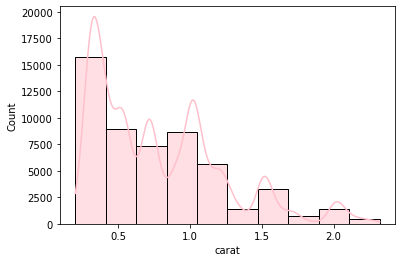

In [11]:
sns.histplot(df['carat'], kde=True, bins=10, color='pink');

Vemos que, a simple vista, la distribución no es normal, ya que la mayoría de casos tienden a concentrarse a la izquierda. Por lo tanto, vemos que la mayoría de diamantes de nuestra muestra tienen la cantidad mínima de carats en comparación con el resto de diamantes.

Ahora, vamos a explorarla matemáticamente: Dado que la muestra tiene más de 5000 casos (N= 53794), vamos a realizar la prueba de Kormogorov:

In [15]:
kstest(df['carat'], 'norm')

KstestResult(statistic=0.5904707898640938, pvalue=0.0)

Al ser p < 0.05 rechazamos H0 y concluimos que los datos de nuestra variable respuesta o dependiente **no son normales**.

#### Normalizamos la variable:

- Descartamos boxcox() porque no nos la normaliza bien (devuelve un Korgomorov con una p < 0.05)
- Descartamos también hacerlo mediante raíces cuadradadas, ya que nuestra muestra esta varada hacia la izquierda y esta normalización podría desequilibrarla aún más.
- Descartamos también el método manual ya que tampoco genera ningún cambio en la distribución de la variable.
- El método MinMaxScaller tampoco nos devuelve la variable con una distribución normal.

In [28]:
#seleccionamos las variables numéricas de nuestro df
numericas = df.select_dtypes(include=np.number)

In [30]:
# almacenamos el modelo:
minmaxsc = MinMaxScaler()

#ajustamos y transformamos el modelo utilizado:
carats_norm = minmaxsc.fit_transform(df[['carat']])

In [35]:
# comprobamos los valores mínimos y máximos:

print(f'El valor mínimo es {carats_norm.min(axis=0)[0]}')
print(f'El valor máximo es {carats_norm.max(axis=0)[0]}')

El valor mínimo es 0.0
El valor máximo es 1.0


In [39]:
#transformamos el array en un df para poder volcarlo luego en el df original:
min_max_num = pd.DataFrame(carats_norm, columns=['carats_norm'])
min_max_num.head()

,carats_norm
0,0.014151
1,0.004717
2,0.014151
3,0.042453
4,0.051887


In [40]:
#creamos una nueva columna con los valores normalizados:
df['carat_norm'] = min_max_num

In [23]:
#aplicamos el método manual según la fórmula matemática:

df['carat_norm'] = (df["carat"] - df["carat"].mean()) / (df["carat"].max() -  df['carat'].mean())

In [24]:
#observamos los valores de la nueva columna:
df.head()

,carat,cut,color,clarity,depth,table,price,lenght_mm,width_mm,depth_mm,carat_norm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-0.365197
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-0.378261
3,0.23,Good,E,VS1,61.8,65.0,327,4.05,4.07,2.31,-0.365197
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-0.326005
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-0.312940


### Boxcox()

In [44]:
df['carat_norm'], lmbd_ajus = stats.boxcox(df['carat'])

lmbd_ajus


-0.07128681590268646

Confirmamos la normalización con una representación gráfica y calculando de nuevo la prueba de Kormogorov:

Text(0.5, 1.0, 'Carat original')

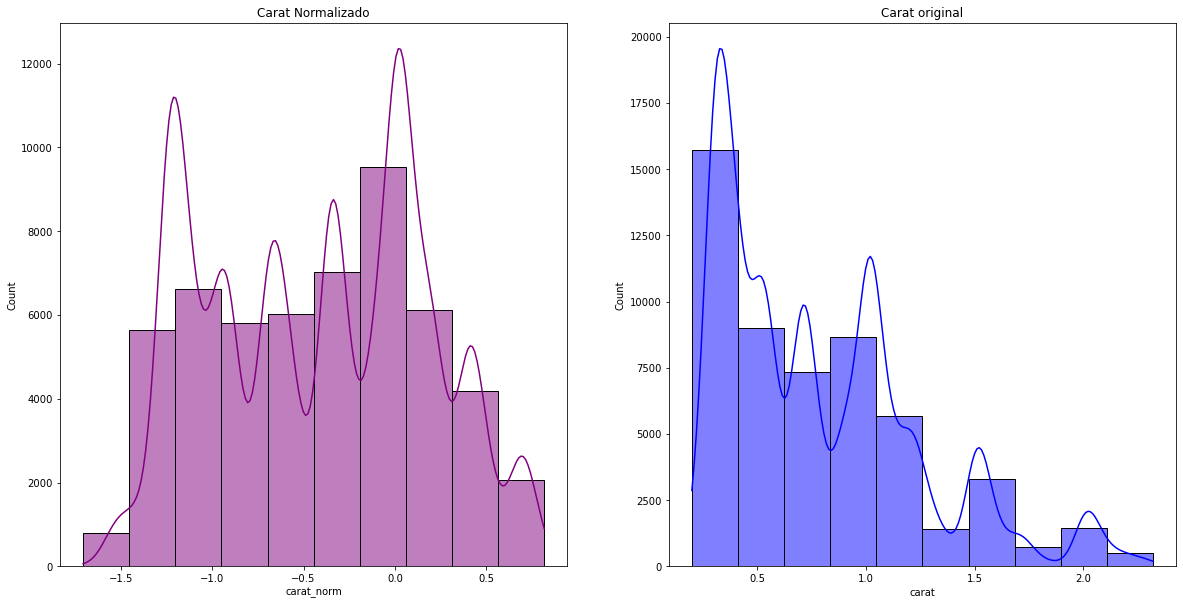

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

sns.histplot(df['carat_norm'], ax = axes[0], kde=True, bins=10, color='purple')
sns.histplot(df['carat'], ax= axes[1], kde=True, bins=10, color='blue')

axes[0].set_title('Carat Normalizado')
axes[1].set_title('Carat original')


In [51]:
kstest(df['carat_norm'], 'norm')

KstestResult(statistic=0.27407572425512006, pvalue=0.0)

### Logarítmica:

In [48]:
df['carat_norm'] = df['carat'].apply(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Carat original')

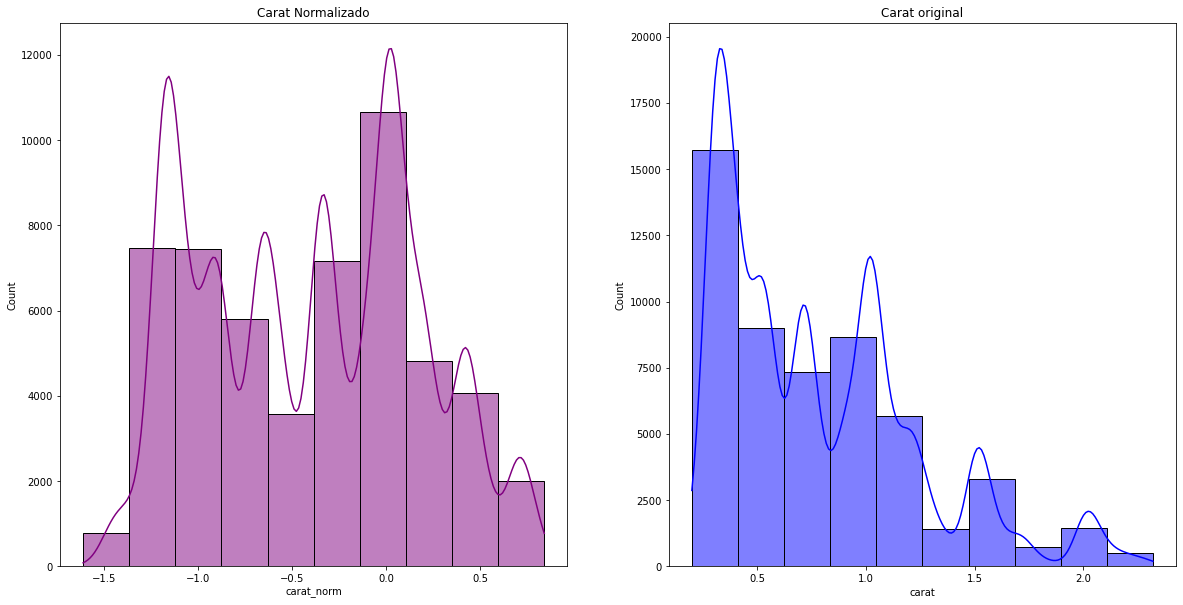

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

sns.histplot(df['carat_norm'], ax = axes[0], kde=True, bins=10, color='purple')
sns.histplot(df['carat'], ax= axes[1], kde=True, bins=10, color='blue')

axes[0].set_title('Carat Normalizado')
axes[1].set_title('Carat original')


In [52]:
kstest(df['carat_norm'], 'norm')

KstestResult(statistic=0.27407572425512006, pvalue=0.0)

## 2. Guardad en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [ ]:
df.to_csv('../datos/diamonds-norm.csv')